In [51]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [52]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [53]:
len(X_train)

60000

In [54]:
len(X_test)

10000

In [55]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [56]:
X_train[0].shape

(28, 28)

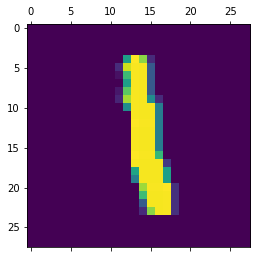

In [57]:
plt.matshow(X_train[6])

In [58]:
y_train[6]


1

In [59]:
X_train.shape

(60000, 28, 28)

In [60]:
X_train=X_train/255
X_test=X_test/255

In [61]:
X_train_flattened= X_train.reshape(len(X_train),28*28)
X_test_flattened= X_test.reshape(len(X_test),28*28)

In [62]:
X_train_flattened.shape
X_test_flattened.shape

(10000, 784)

In [63]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 592us/step - loss: 0.4689 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 1s 622us/step - loss: 0.3035 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 1s 585us/step - loss: 0.2829 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 1s 585us/step - loss: 0.2732 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 1s 588us/step - loss: 0.2661 - accuracy: 0.9257


In [64]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 529us/step - loss: 0.2697 - accuracy: 0.9250


[0.26969948410987854, 0.925000011920929]

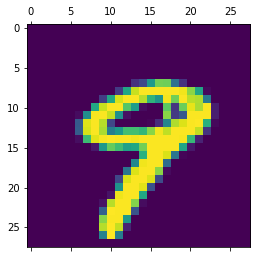

In [72]:
plt.matshow(X_test[9])

In [69]:
y_predicted=model.predict(X_test_flattened)

313/313 [==============================] - 0s 455us/step


In [74]:
y_predicted[9]

array([1.4250031e-04, 4.9970719e-08, 9.5993064e-06, 4.8727199e-04,
       8.2010418e-01, 2.4210396e-03, 2.0606476e-05, 8.5018510e-01,
       3.9798126e-01, 9.9521554e-01], dtype=float32)

In [73]:
np.argmax(y_predicted[9])

9

In [75]:
y_predicted_labels=[np.argmax(i)for i in y_predicted]

In [76]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    0,    2,    0,    5,    7,    2,    4,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   4,    8,  918,   17,    7,    4,   12,    9,   50,    3],
       [   2,    0,   16,  926,    0,   23,    2,   10,   25,    6],
       [   2,    1,    4,    1,  921,    0,    9,    3,   11,   30],
       [   8,    2,    2,   36,   12,  769,   15,    5,   38,    5],
       [  10,    3,    7,    1,    7,   11,  914,    2,    3,    0],
       [   1,    8,   21,   11,    8,    0,    0,  940,    6,   33],
       [   5,    6,    6,   22,    9,   19,    9,    6,  886,    6],
       [   9,    7,    1,   13,   33,    5,    0,   20,   15,  906]])>

Text(69.0, 0.5, 'Truth')

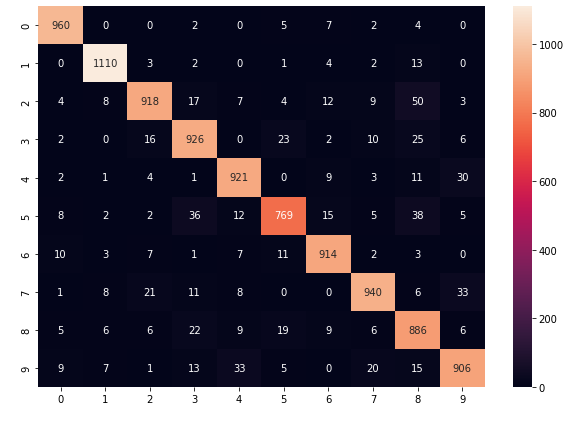

In [81]:
from turtle import color
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d',color='white')
plt.xlabel('Predicted',color='white')
plt.ylabel('Truth',color='white')

In [82]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 781us/step - loss: 0.2718 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 1s 725us/step - loss: 0.1245 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 1s 766us/step - loss: 0.0871 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 1s 793us/step - loss: 0.0665 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 1s 754us/step - loss: 0.0516 - accuracy: 0.9847


In [83]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 591us/step - loss: 0.0791 - accuracy: 0.9759


[0.07911716401576996, 0.9758999943733215]

313/313 [==============================] - 0s 497us/step


Text(69.0, 0.5, 'Truth')

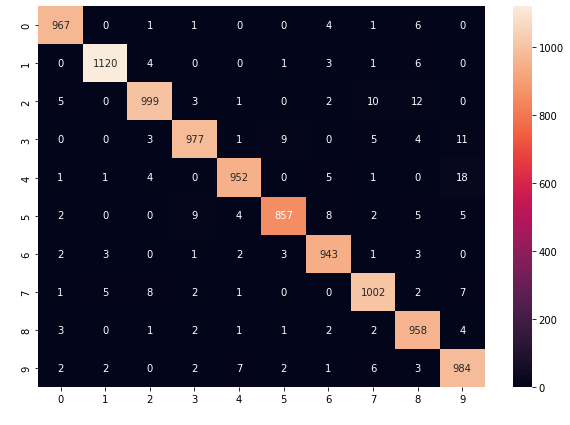

In [84]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i)for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d',color='white')
plt.xlabel('Predicted',color='white')
plt.ylabel('Truth',color='white')

In [102]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(250,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
loss=keras.losses.sparse_categorical_crossentropy,
metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1926 - accuracy: 0.9403
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0858 - accuracy: 0.9738
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0637 - accuracy: 0.9804
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0475 - accuracy: 0.9844
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0399 - accuracy: 0.9877
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0316 - accuracy: 0.9898
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0279 - accuracy: 0.9912
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0231 - accuracy: 0.9929
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0234 - accuracy: 0.9929
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.020

In [104]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 987us/step - loss: 0.2180 - accuracy: 0.9820


[0.2179718315601349, 0.9819999933242798]

313/313 [==============================] - 0s 859us/step


Text(69.0, 0.5, 'Truth')

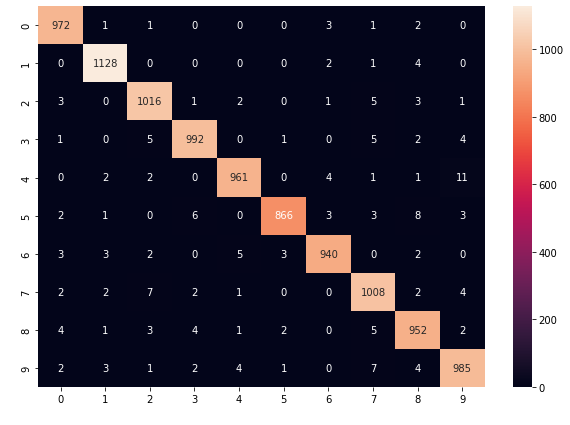

In [106]:
y_predicted=model.predict(X_test)
y_predicted_labels=[np.argmax(i)for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d',color='white')
plt.xlabel('Predicted',color='white')
plt.ylabel('Truth',color='white')